# Detection of IoT Threats with Deep Learning

Syed Badruddoja, Justin Hicks, Keith Santamaria

## Importing libraries

In [1]:
#Running default example as per assignment
from __future__ import absolute_import, division, print_function, unicode_literals

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import svm, metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import csv
import time


print(tf.__version__)



1.14.0


## Importing and Preprocessing of data.

This Notebook assumes you have the dataset locally stored in the same location as the notebook.

If using Google Collab you can upload those files by clicking the folder icon on the left column and then clicking upload. 

Location of the dataset we used is in this github : https://github.com/JJHicks/IoT-Botnet-Attack-Detection

In [2]:
#Reading Training Data
training_data_import=pd.read_csv('train_data.csv')
training_target_import=pd.read_csv('train_target.csv')

train_data_as_numpy = training_data_import.to_numpy()
train_target_as_numpy = training_target_import.to_numpy()
train_target_flattened = train_target_as_numpy.flatten()

#preprocessing data for normalization
scaler = preprocessing.StandardScaler().fit(train_data_as_numpy)
train_data_transformed = scaler.transform(train_data_as_numpy)

train_data=train_data_transformed
train_target=train_target_flattened
print("train_data shape: ",train_data.shape)
print("train_target shape: ",train_target.shape)


train_data shape:  (82331, 41)
train_target shape:  (82331,)


In [3]:
#Reading Testing Data
testing_data_import=pd.read_csv('test_data.csv')
testing_target_import=pd.read_csv('test_target.csv')


#converting data to numpy array
test_data_as_numpy = testing_data_import.to_numpy()
test_target_as_numpy = testing_target_import.to_numpy()
test_target_flattened = test_target_as_numpy.flatten()

#preprocessing data for normalization
scaler = preprocessing.StandardScaler().fit(test_data_as_numpy)
test_data_transformed = scaler.transform(test_data_as_numpy)

test_data=test_data_transformed
test_target=test_target_flattened
print("test_data shape: ",test_data.shape)
print("test_target shape: ",test_target.shape)

test_data shape:  (81172, 41)
test_target shape:  (81172,)


## Defining our experiment workflow

So for our experiments we wil be doing the following for each model:

* Define and compile the model

* Determine the best number of epochs by running the model with 100 epochs and seeing where it starts to overfit.

* Recompile model and then generate learning curve with optimal # of epochs

* Generate a confusion matrix

Once this is done for each model we will compare the models by using the confusion matrix to determine overall accuracy and the recall per category 



In [4]:
def gen_learning_curve(model,max_epoch, train_data, test_data, train_target, test_target):
    training_accuracy_per_epoch = []
    testing_accuracy_per_epoch = []
    for i in range(1,max_epoch+1):
        print("Iteration ",i)
        train=model.fit(train_data, train_target, epochs=1)
        test_loss, test_acc = model.evaluate(test_data,  test_target, verbose=2)
        training_accuracy_per_epoch .append(train.history['acc'][-1])
        testing_accuracy_per_epoch.append(test_acc)
    return training_accuracy_per_epoch, testing_accuracy_per_epoch

def gen_plot_range(max_range):
    x= []
    for i in range(1,max_range+1):
        x.append(i)
    return x

def gen_learning_curve_image(max_epoch, train_accuracy,test_accuracy, dimension_x, dimension_y):
    x = gen_plot_range(max_epoch)
    #Setting x-labels
    plt.figure(figsize=(dimension_x, dimension_y))
    #Plotting the two different lines
    plt.plot(x,train_accuracy,marker='o',color='b')
    plt.plot(x,test_accuracy,marker='v',color='r')
    #Putting a title and labels
    plt.title("Learning curve over training time")
    plt.ylabel("Value of accuracy")
    plt.xlabel("Epoch number")
    plt.legend(['Test Accuracy','Train Accuracy'],loc = 'lower right')
    plt.xticks(x)
    plt.show()

def gen_cf(model,test_dataset,test_target):
    predictions_probabilities = model.predict(test_dataset)
    predictions= predictions_probabilities.argmax(axis=1)
    model_confusion_matrix=confusion_matrix(test_target,predictions)
    return model_confusion_matrix

def gen_cf_image(matrix):
    df_cm= pd.DataFrame(matrix, range(10), range(10))
    sn.set(font_scale=1.4) # for label size
    fig, ax = plt.subplots(figsize=(20,10))  
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 20},ax=ax,fmt='g') # font size
    plt.show()

def optimal_epoch_search(model, train_data, test_data, train_target, test_target):
    temp_train_accuracy, temp_test_accuracy = gen_learning_curve(model, 100, train_data, test_data, train_target, test_target)
    gen_learning_curve_image(100, temp_train_accuracy, temp_test_accuracy, 50, 5)

In [5]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Iteration  1
82331/82331 [==============================] - 2s 27us/sample - loss: 0.6294 - acc: 0.7851
81172/81172 - 1s - loss: 0.4494 - acc: 0.8750
Iteration  2
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4959 - acc: 0.8275
81172/81172 - 1s - loss: 0.4285 - acc: 0.8793
Iteration  3
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4632 - acc: 0.8361
81172/81172 - 1s - loss: 0.5035 - acc: 0.8737
Iteration  4
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4457 - acc: 0.8405
81172/81172 - 1s - loss: 0.4828 - acc: 0.8762
Iteration  5
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4335 - acc: 0.8441
81172/81172 - 1s - loss: 0.5411 - acc: 0.8774
Iteration  6
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4240 - acc: 0.8473
81172/81172 - 1s - loss: 0.5727 - acc: 0.8704
Iteration  7
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4181 - acc: 0.8

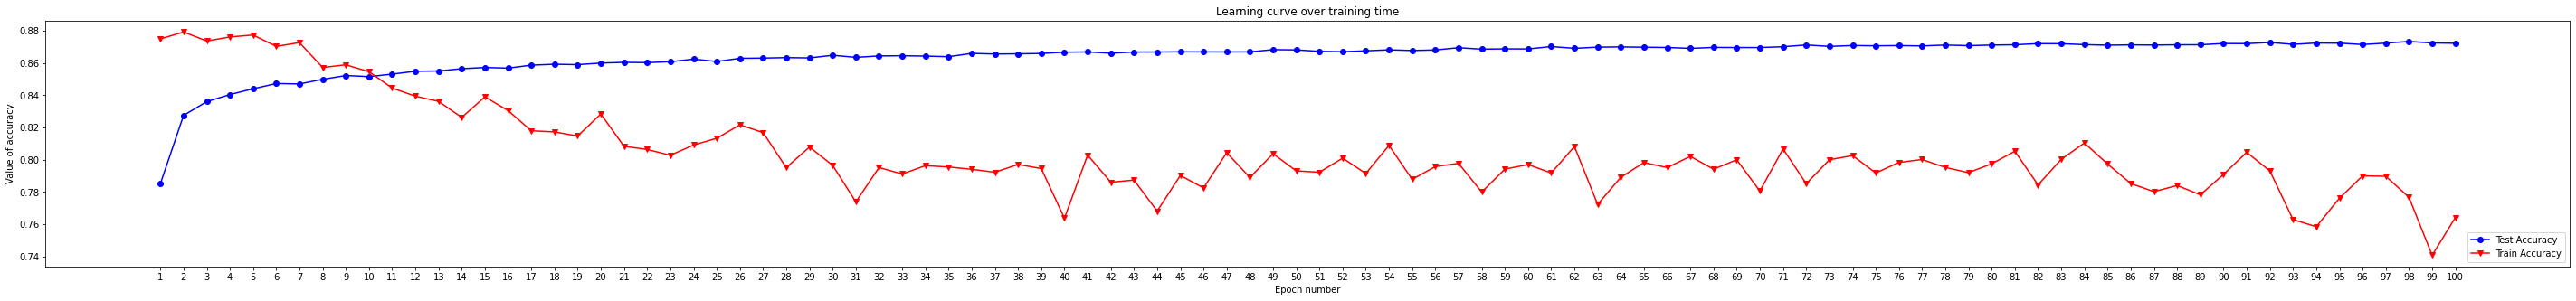

In [6]:
optimal_epoch_search(model, train_data, test_data, train_target, test_target)

In [7]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Iteration  1
82331/82331 [==============================] - 2s 27us/sample - loss: 0.6274 - acc: 0.7874
81172/81172 - 1s - loss: 0.5365 - acc: 0.8530
Iteration  2
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4910 - acc: 0.8297
81172/81172 - 1s - loss: 0.4809 - acc: 0.8652
Iteration  3
82331/82331 [==============================] - 2s 27us/sample - loss: 0.4593 - acc: 0.8370
81172/81172 - 1s - loss: 0.6014 - acc: 0.8473
Iteration  4
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4418 - acc: 0.8425
81172/81172 - 1s - loss: 0.5929 - acc: 0.8544
Iteration  5
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4299 - acc: 0.8446
81172/81172 - 1s - loss: 0.7124 - acc: 0.8376
Iteration  6
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4207 - acc: 0.8468
81172/81172 - 1s - loss: 0.7140 - acc: 0.8428
Iteration  7
82331/82331 [==============================] - 2s 26us/sample - loss: 0.4131 - acc: 0.8

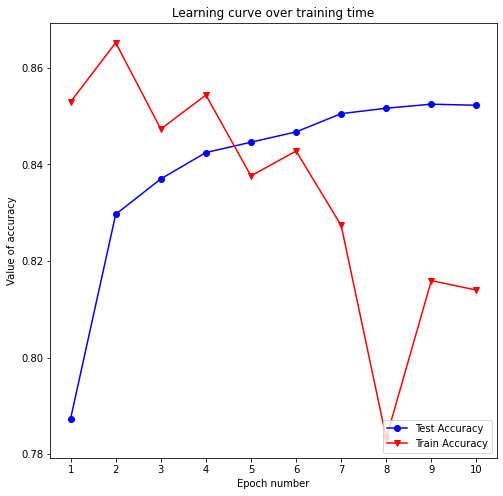

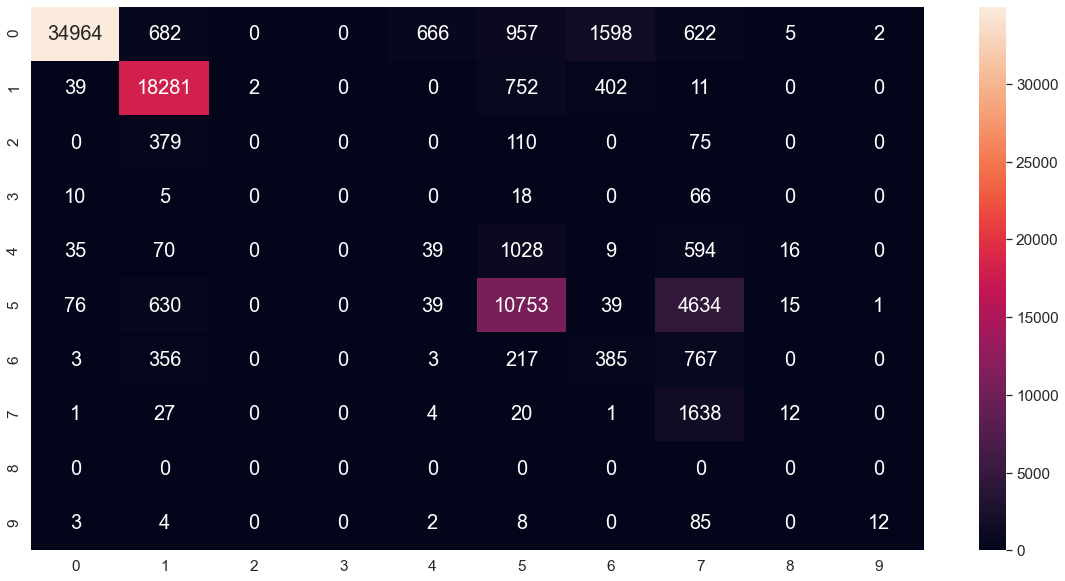

In [8]:
chosen_epoch=10

model_1_train_accuracy, model_1_test_accuracy = gen_learning_curve(model, chosen_epoch, train_data, test_data, train_target, test_target)

gen_learning_curve_image(chosen_epoch, model_1_train_accuracy, model_1_test_accuracy, 8, 8)

model_1_matrix=gen_cf(model, test_data, test_target)

gen_cf_image(model_1_matrix)

## Model 2

* Adam optimizer
* Guassian noise layer
* Dense layer with relu activation function
* Dense layer with softmax activation function

In [9]:
model = keras.Sequential([
    keras.layers.GaussianNoise(0.01),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

Iteration  1
82331/82331 [==============================] - 3s 31us/sample - loss: 0.6211 - acc: 0.7902
81172/81172 - 1s - loss: 0.5003 - acc: 0.8678
Iteration  2
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4941 - acc: 0.8290
81172/81172 - 1s - loss: 0.5067 - acc: 0.8703
Iteration  3
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4630 - acc: 0.8355
81172/81172 - 1s - loss: 0.4770 - acc: 0.8761
Iteration  4
82331/82331 [==============================] - 2s 29us/sample - loss: 0.4460 - acc: 0.8408
81172/81172 - 1s - loss: 0.4914 - acc: 0.8779
Iteration  5
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4359 - acc: 0.8423
81172/81172 - 1s - loss: 0.4947 - acc: 0.8836
Iteration  6
82331/82331 [==============================] - 2s 29us/sample - loss: 0.4263 - acc: 0.8447
81172/81172 - 1s - loss: 0.5313 - acc: 0.8796
Iteration  7
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4199 - acc: 0.8

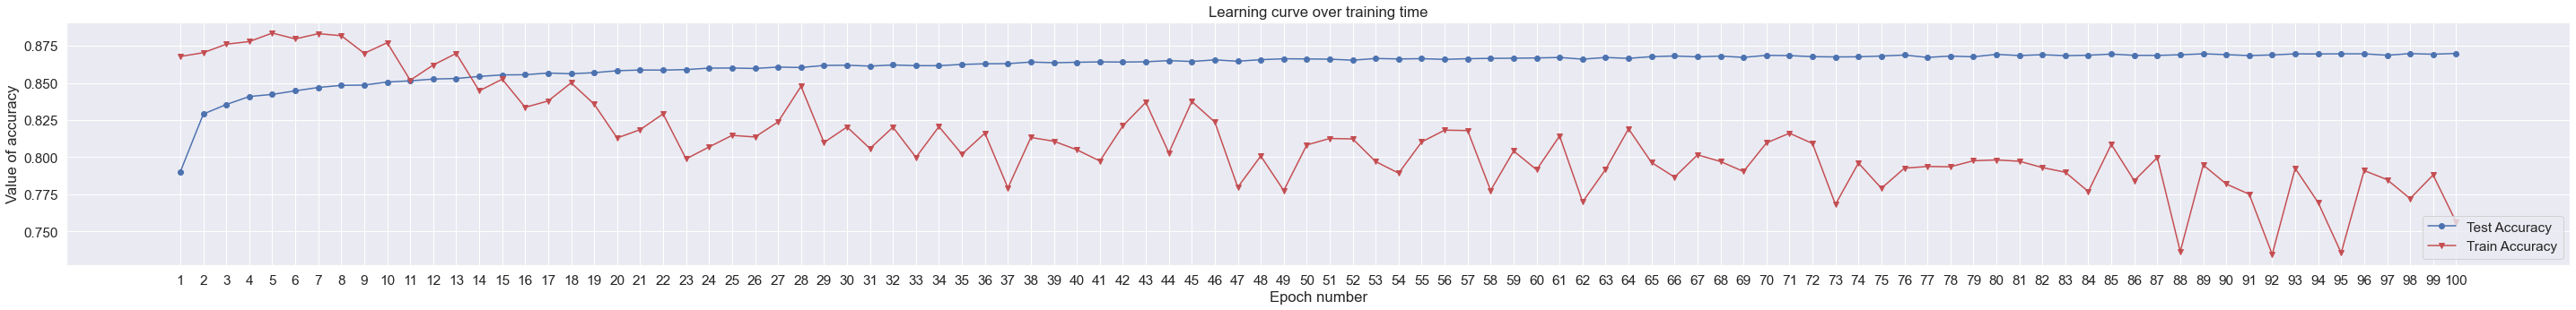

In [10]:
optimal_epoch_search(model, train_data, test_data, train_target, test_target)

In [11]:
model = keras.Sequential([
    keras.layers.GaussianNoise(0.01),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

Iteration  1
82331/82331 [==============================] - 3s 31us/sample - loss: 0.6362 - acc: 0.7821
81172/81172 - 1s - loss: 0.4932 - acc: 0.8623
Iteration  2
82331/82331 [==============================] - 3s 31us/sample - loss: 0.4976 - acc: 0.8268
81172/81172 - 1s - loss: 0.5182 - acc: 0.8571
Iteration  3
82331/82331 [==============================] - 3s 31us/sample - loss: 0.4633 - acc: 0.8357
81172/81172 - 1s - loss: 0.5273 - acc: 0.8627
Iteration  4
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4455 - acc: 0.8406
81172/81172 - 1s - loss: 0.5749 - acc: 0.8597
Iteration  5
82331/82331 [==============================] - 3s 30us/sample - loss: 0.4331 - acc: 0.8434
81172/81172 - 1s - loss: 0.6032 - acc: 0.8594
Iteration  6
82331/82331 [==============================] - 3s 31us/sample - loss: 0.4243 - acc: 0.8460
81172/81172 - 1s - loss: 0.6520 - acc: 0.8533
Iteration  7
82331/82331 [==============================] - 3s 31us/sample - loss: 0.4170 - acc: 0.8

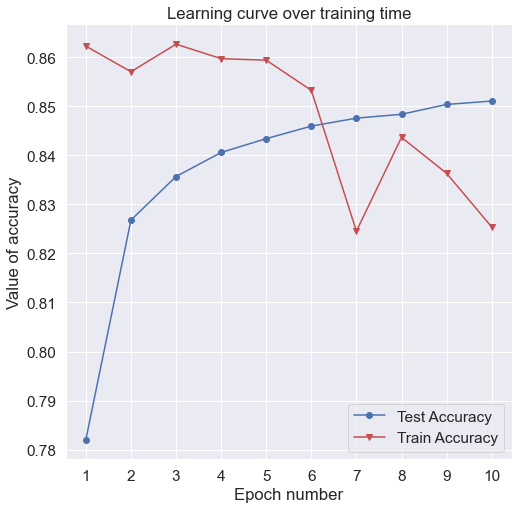

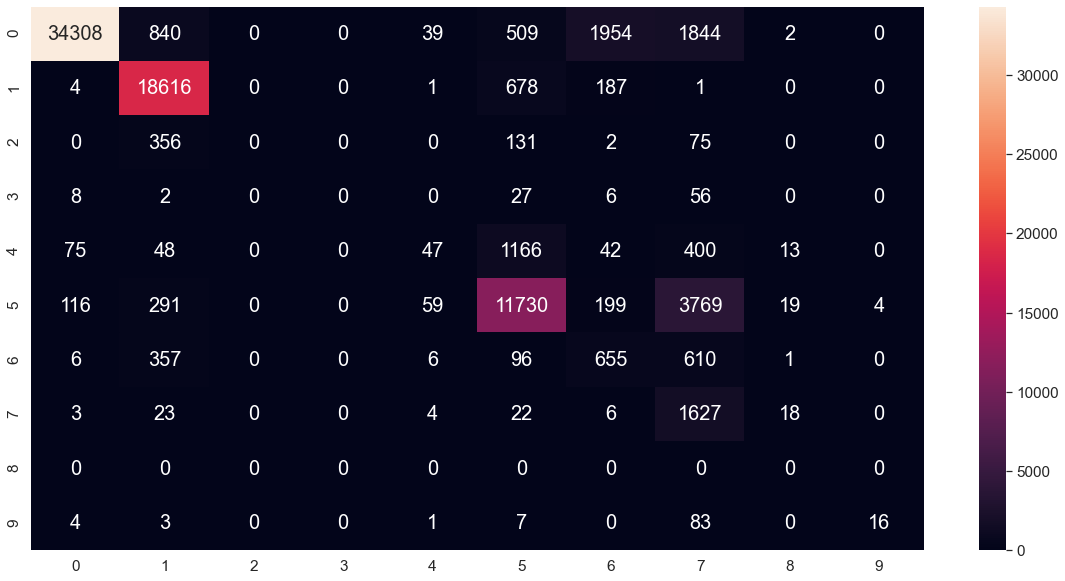

In [12]:
chosen_epoch=10

model_2_train_accuracy, model_2_test_accuracy = gen_learning_curve(model, chosen_epoch, train_data, test_data, train_target, test_target)

gen_learning_curve_image(chosen_epoch, model_2_train_accuracy, model_2_test_accuracy, 8, 8)

model_2_matrix=gen_cf(model, test_data, test_target)

gen_cf_image(model_2_matrix)

## Model 3

* Nadam optimizer
* Dense layer with relu activation function
* Dense layer with softmax activation function

In [13]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Iteration  1
82331/82331 [==============================] - 3s 31us/sample - loss: 0.6269 - acc: 0.7884
81172/81172 - 1s - loss: 0.4691 - acc: 0.8620
Iteration  2
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4922 - acc: 0.8284
81172/81172 - 1s - loss: 0.4060 - acc: 0.8797
Iteration  3
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4611 - acc: 0.8373
81172/81172 - 1s - loss: 0.4729 - acc: 0.8745
Iteration  4
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4454 - acc: 0.8411
81172/81172 - 1s - loss: 0.4587 - acc: 0.8822
Iteration  5
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4326 - acc: 0.8447
81172/81172 - 1s - loss: 0.4499 - acc: 0.8795
Iteration  6
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4242 - acc: 0.8461
81172/81172 - 1s - loss: 0.4921 - acc: 0.8797
Iteration  7
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4161 - acc: 0.8

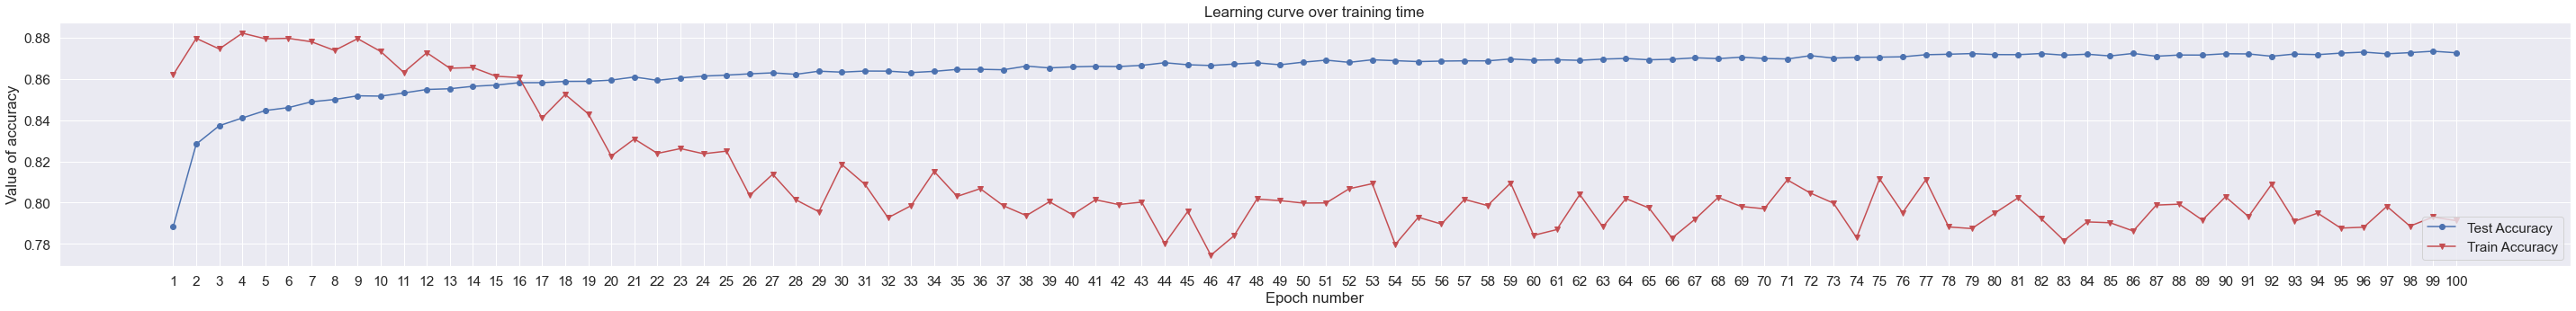

In [14]:
optimal_epoch_search(model, train_data, test_data, train_target, test_target)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Iteration  1
82331/82331 [==============================] - 2s 30us/sample - loss: 0.6276 - acc: 0.7885
81172/81172 - 1s - loss: 0.4450 - acc: 0.8834
Iteration  2
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4917 - acc: 0.8292
81172/81172 - 1s - loss: 0.4489 - acc: 0.8815
Iteration  3
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4610 - acc: 0.8363
81172/81172 - 1s - loss: 0.4680 - acc: 0.8799
Iteration  4
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4445 - acc: 0.8413
81172/81172 - 1s - loss: 0.4828 - acc: 0.8801
Iteration  5
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4328 - acc: 0.8445
81172/81172 - 1s - loss: 0.5174 - acc: 0.8750
Iteration  6
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4240 - acc: 0.8465
81172/81172 - 1s - loss: 0.5104 - acc: 0.8777
Iteration  7
82331/82331 [==============================] - 2s 30us/sample - loss: 0.4168 - acc: 0.8

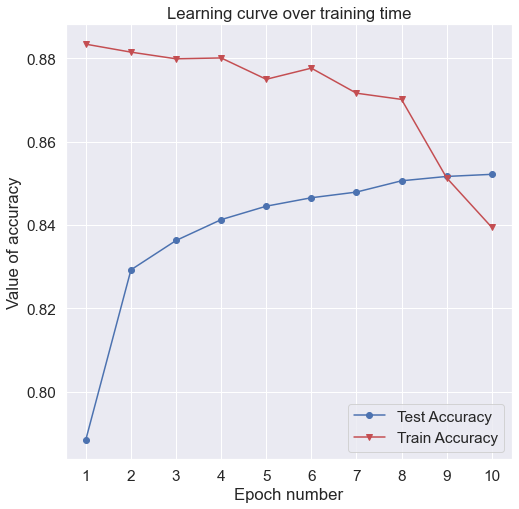

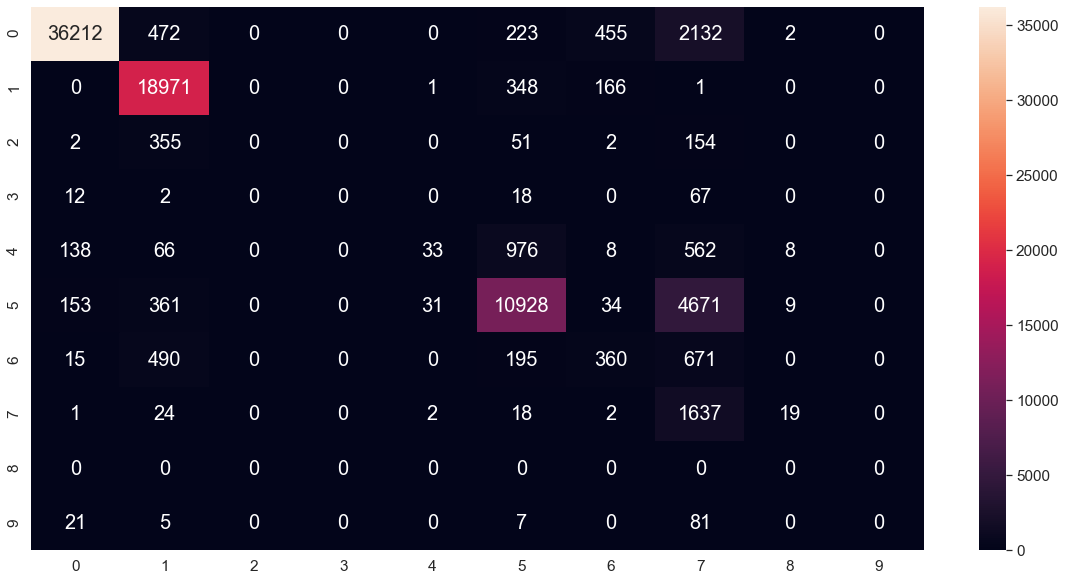

In [16]:
chosen_epoch= 10

model_3_train_accuracy, model_3_test_accuracy = gen_learning_curve(model, chosen_epoch, train_data, test_data, train_target, test_target)

gen_learning_curve_image(chosen_epoch, model_3_train_accuracy, model_3_test_accuracy, 8, 8)

model_3_matrix=gen_cf(model, test_data, test_target)

gen_cf_image(model_3_matrix)

## Model 4

* Nadam optimizer
* Guassian noise layer
* Dense layer with relu activation function
* Dense layer with softmax activation function

In [17]:
model = keras.Sequential([
    keras.layers.GaussianNoise(0.01),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

Iteration  1
82331/82331 [==============================] - 3s 34us/sample - loss: 0.6319 - acc: 0.7867
81172/81172 - 1s - loss: 0.4422 - acc: 0.8712
Iteration  2
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4960 - acc: 0.8289
81172/81172 - 1s - loss: 0.4376 - acc: 0.8782
Iteration  3
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4608 - acc: 0.8373
81172/81172 - 1s - loss: 0.4901 - acc: 0.8746
Iteration  4
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4423 - acc: 0.8419
81172/81172 - 1s - loss: 0.4886 - acc: 0.8681
Iteration  5
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4312 - acc: 0.8449
81172/81172 - 1s - loss: 0.4777 - acc: 0.8759
Iteration  6
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4222 - acc: 0.8468
81172/81172 - 1s - loss: 0.5233 - acc: 0.8656
Iteration  7
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4164 - acc: 0.8

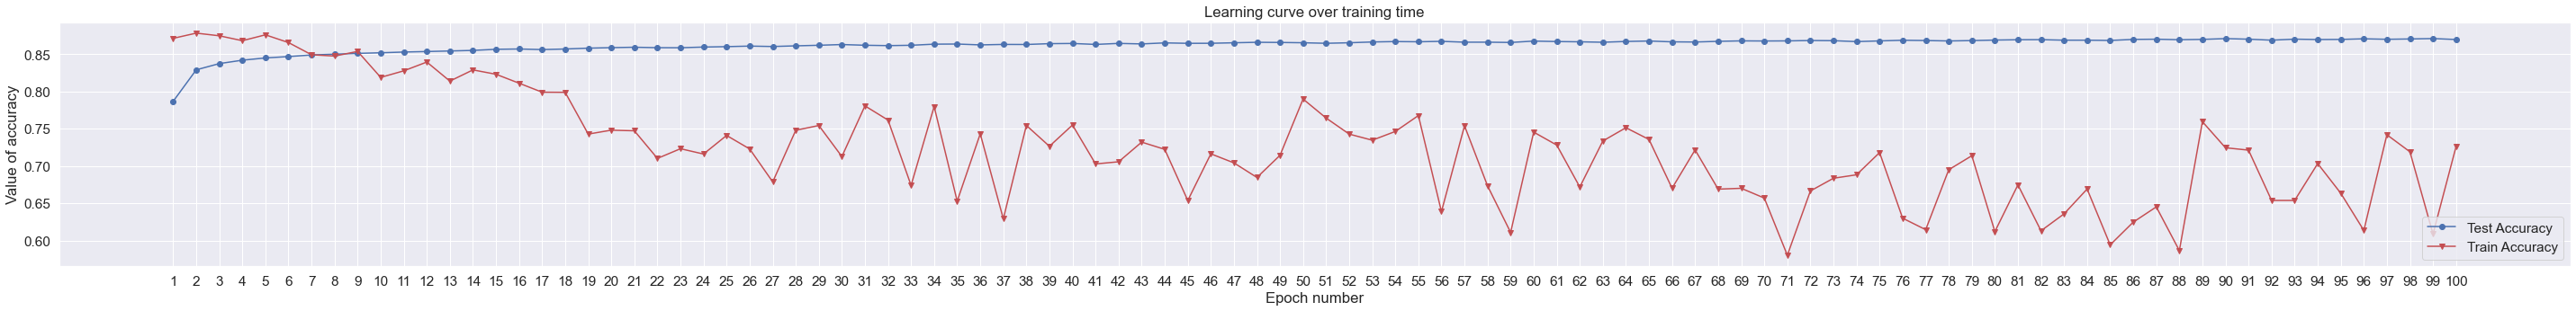

In [18]:
optimal_epoch_search(model, train_data, test_data, train_target, test_target)

In [19]:
model = keras.Sequential([
    keras.layers.GaussianNoise(0.01),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

Iteration  1
82331/82331 [==============================] - 3s 35us/sample - loss: 0.6246 - acc: 0.7888
81172/81172 - 1s - loss: 0.4997 - acc: 0.8672
Iteration  2
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4942 - acc: 0.8275
81172/81172 - 1s - loss: 0.4571 - acc: 0.8812
Iteration  3
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4622 - acc: 0.8363
81172/81172 - 1s - loss: 0.4737 - acc: 0.8797
Iteration  4
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4453 - acc: 0.8414
81172/81172 - 1s - loss: 0.5399 - acc: 0.8748
Iteration  5
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4337 - acc: 0.8446
81172/81172 - 1s - loss: 0.5303 - acc: 0.8851
Iteration  6
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4257 - acc: 0.8462
81172/81172 - 1s - loss: 0.5232 - acc: 0.8819
Iteration  7
82331/82331 [==============================] - 3s 33us/sample - loss: 0.4184 - acc: 0.8

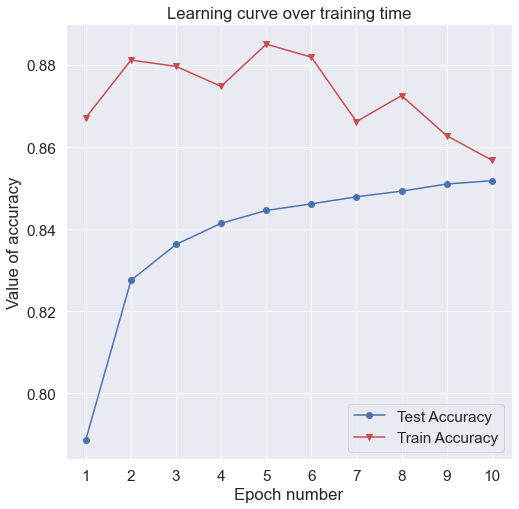

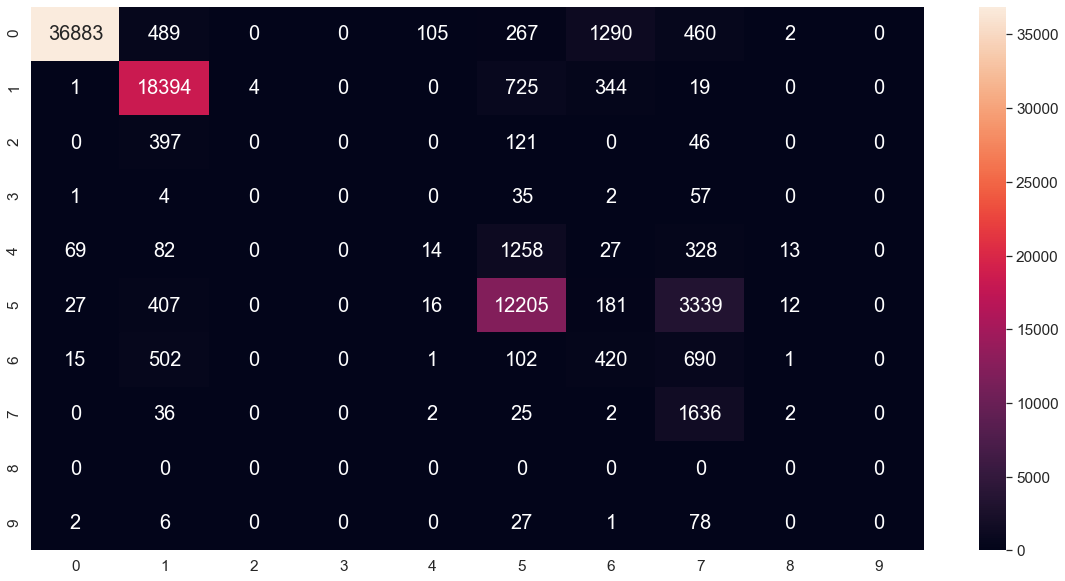

In [20]:
chosen_epoch= 10

model_4_train_accuracy, model_4_test_accuracy = gen_learning_curve(model, chosen_epoch, train_data, test_data, train_target, test_target)

gen_learning_curve_image(chosen_epoch, model_4_train_accuracy, model_4_test_accuracy, 8, 8)

model_4_matrix=gen_cf(model, test_data, test_target)

gen_cf_image(model_4_matrix)

## Results

Base Accuracy

In [21]:
print("Model 1: ")
print("Training Accuracy: ",model_1_train_accuracy[-1])
print("Testing Accuracy: ",model_1_test_accuracy[-1])

print("Model 2: ")
print("Training Accuracy: ",model_2_train_accuracy[-1])
print("Testing Accuracy: ",model_2_test_accuracy[-1])

print("Model 3: ")
print("Training Accuracy: ",model_3_train_accuracy[-1])
print("Testing Accuracy: ",model_3_test_accuracy[-1])

print("Model 4: ")
print("Training Accuracy: ",model_4_train_accuracy[-1])
print("Testing Accuracy: ",model_4_test_accuracy[-1])

Model 1: 
Training Accuracy:  0.8522671
Testing Accuracy:  0.8139753
Model 2: 
Training Accuracy:  0.8510767
Testing Accuracy:  0.82539546
Model 3: 
Training Accuracy:  0.8521699
Testing Accuracy:  0.83946437
Model 4: 
Training Accuracy:  0.85181767
Testing Accuracy:  0.85684717


Reference for making the confusion matrix image

https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers